In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Problem Statement

# 2. Data Gathering

In [ ]:
df = pd.read_csv('autos_dataset.csv')
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# df.isna().sum()

# 3. EDA

## 3.1 Encoding

In [ ]:
df.replace({'?':np.nan},inplace = True)

In [ ]:
# df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df.drop('make','aspiration','fuel-type','num-of-doors','body-style','drive-wheels','engine-location',
        'engine-[type','fuel-system'],axis = 1, inplace=True)

In [ ]:
# df.info()

In [ ]:
df.drop('normalized-losses',axis =1 , inplace =True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    object 
 7   engine-size        205 non-null    int64  
 8   bore               201 non-null    object 
 9   stroke             201 non-null    object 
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    object 
 12  peak-rpm           203 non-null    object 
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    object 
dtypes: float64(5), int64(5), o

In [ ]:
# df.isna().sum()

In [ ]:
df['bore'].fillna(df['bore'].median(),inplace= True)
df['stroke'].fillna(df['stroke'].median(),inplace= True)
df['horsepower'].fillna(df['horsepower'].median(),inplace= True)
df['peak-rpm'].fillna(df['peak-rpm'].median(),inplace= True)
df['price'].fillna(df['price'].median(),inplace= True)



In [ ]:
# df.isna().sum()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    object 
 7   engine-size        205 non-null    int64  
 8   bore               205 non-null    object 
 9   stroke             205 non-null    object 
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    object 
 12  peak-rpm           205 non-null    object 
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              205 non-null    object 
dtypes: float64(5), int64(5), o

In [ ]:
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['peak-rpm'] = df['peak-rpm'].astype(float)
df['price'] = df['price'].astype(float)


In [ ]:
# df['num-of-cylinders'] = df['num-of-cylinders'].astype(float)


In [ ]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
df['num-of-cylinders'].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 
                                'two':2, 'eight':8},inplace = True)


In [ ]:
# df['num-of-cylinders']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               205 non-null    float64
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    float64
 12  peak-rpm           205 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              205 non-null    float64
dtypes: float64(10), int64(6)
m

# Train and Test Data

In [ ]:
x = df.drop('price',axis = 1)
y = df['price']

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)
# x_train

# Model Training 

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Evaluation

### Residual

# Assumption of Normality

# Residual

In [ ]:
y_pred = lr_model.predict(x_test)
residual = y_test - y_pred
# residual

# 1. Density plot

<AxesSubplot:xlabel='price', ylabel='Density'>

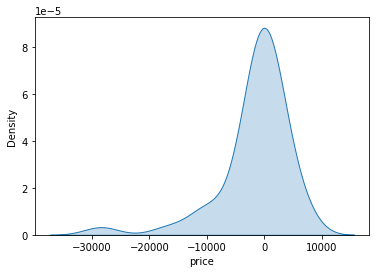

In [ ]:
sns.kdeplot(residual,fill=True)  

# 2. Shapiro Test

In [ ]:
Null Hypothesis >> data was drawn from a normal distribution
Accept >> Null Hypothesis   >> If your p_val value is greater than your significance level(5%)
Reject >> Alternative Hypothesis >>  If your p_val value is less than or equal to your significance level(5%)
p_val = 0.05
if p_val > 0.05:
    print("accepting Null Hypothesis")
    
else:
    print("Rejecting Null Hypothesis")

In [ ]:
from scipy.stats import shapiro, normaltest, kstest

In [ ]:
_,p_val = shapiro(residual)
print("p value is :",p_val)

if p_val > 0.05:
    print('Data is normally distributed')
    
else:
    print('Data is not normally distributed')

p value is : 1.5074285784066888e-06
Data is not normally distributed


# 3. normaltest

In [ ]:
_,p_val = normaltest(residual)
print("p value is :",p_val)

if p_val > 0.05:
    print('Data is normally distributed')
    
else:
    print('Data is not normally distributed')

p value is : 5.806371163874559e-09
Data is not normally distributed


# 4. kstest

In [ ]:
_,p_val = kstest(residual,'norm')
print("p value is :",p_val)

if p_val > 0.05:
    print('Data is normally distributed')
    
else:
    print('Data is not normally distributed')

p value is : 1.6559444344151947e-10
Data is not normally distributed


# 5. QQ Plot

In [ ]:
import scipy.stats as sts
import statsmodels.api as sm

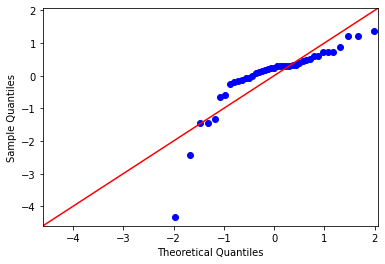

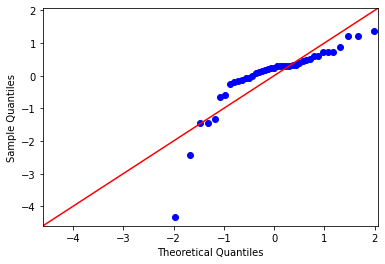

In [ ]:
sm.qqplot(residual,line = '45',dist = sts.norm,fit=True)

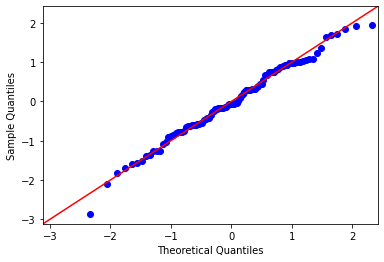

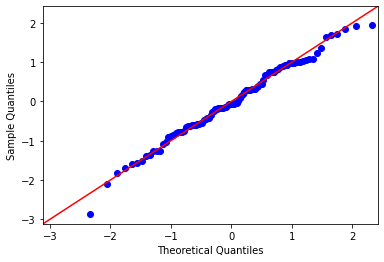

In [ ]:
sm.qqplot(normal_array,line = '45',dist = sts.norm)

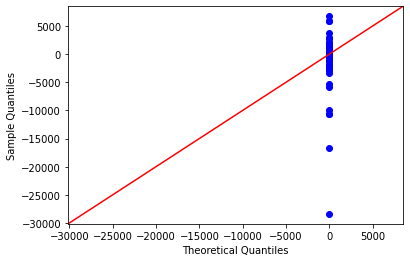

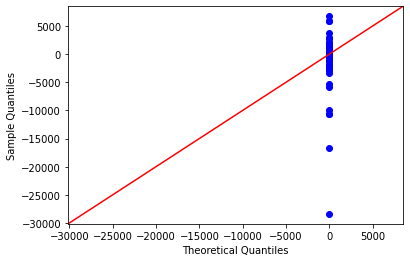

In [ ]:
sm.qqplot(residual,line = '45')

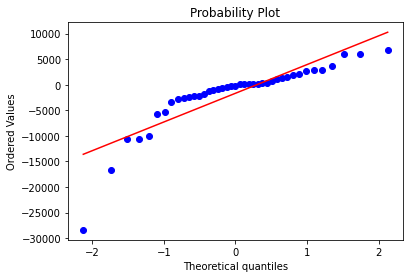

In [ ]:
sts.probplot(residual,dist='norm',plot = plt)
plt.show()

In [ ]:
normal_array = np.random.randn(100)
# normal_array


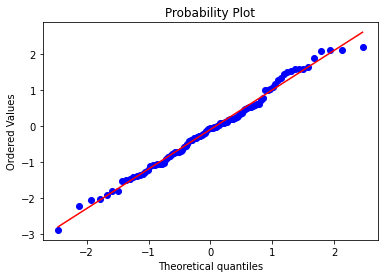

In [ ]:
sts.probplot(normal_array,dist='norm',plot = plt)
plt.show()

<AxesSubplot:ylabel='Density'>

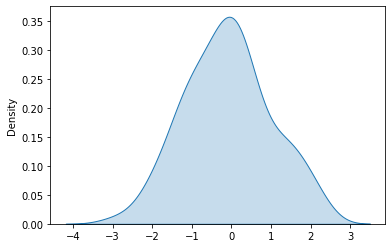

In [ ]:
sns.kdeplot(normal_array,fill=True) 

In [ ]:
_,p_val = shapiro(normal_array)
print("p value is :",p_val)

if p_val > 0.05:
    print('Data is normally distributed')
    
else:
    print('Data is not normally distributed')

p value is : 0.6308010816574097
Data is normally distributed


# Assumption of Homscedascticity

c:\users\rahul\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

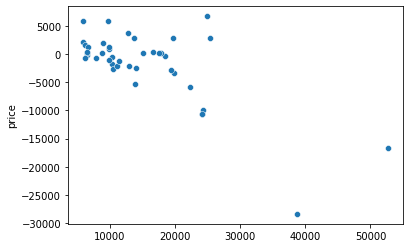

In [ ]:
sns.scatterplot(y_pred,residual)

### Test Data

In [ ]:
y_pred = lr_model.predict(x_test)
# y_pred[:5]
mse = mean_squared_error(y_test, y_pred)
print("Mean squared value is ",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared error is :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error is ",mae)

r2score = r2_score(y_test, y_pred)
print("R2 score is :",r2score)

Mean squared value is  41136422.3598216
Root Mean Squared error is : 6413.768187253231
Mean Absolute Error is  3667.936869305307
R2 score is : 0.07063200888270205


### Train Data

In [ ]:
y_pred_train = lr_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean squared Error on Training data is ",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared error is :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error on Training data is ",mae)

r2score = r2_score(y_train, y_pred_train)
print("R2 score on Training data is :",r2score)

Mean squared Error on Training data is  7894634.86912864
Root Mean Squared error is : 2809.7392884623014
Mean Absolute Error on Training data is  2072.8332119111274
R2 score on Training data is : 0.8806368038460701


In [ ]:
y_test.shape

(41,)

In [ ]:
x_test.shape

(41, 15)

In [ ]:
x_test.iloc[0]

symboling               2.00
wheel-base             96.10
length                176.80
width                  66.60
height                 50.50
curb-weight          2460.00
num-of-cylinders        4.00
engine-size           132.00
bore                    3.46
stroke                  3.90
compression-ratio       8.70
horsepower             95.00
peak-rpm             5200.00
city-mpg               23.00
highway-mpg            31.00
Name: 131, dtype: float64

In [ ]:
user_values = np.array([[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]])
user_values

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]])

In [ ]:
lr_model.predict(user_values)

array([-100373.07653182])